In [1]:
import numpy as np
import pandas as pd

In [2]:
X = pd.read_csv('df_input_to_ga.csv')
target = pd.read_csv('../cleaned-data-frames/target-electricity-consumption.csv')

In [3]:
# making the lengths the same

X = X*100000
X = X.iloc[0:7536,:]
X = X.drop(columns = 'Unnamed: 0')

In [4]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

#X = clean_dataset(X)
#target = clean_dataset(target)

In [5]:
target_vector = target['Consumption']
input = X

In [6]:
target_vector

0       15417.0
1       14891.0
2       14506.0
3       14226.0
4       14211.0
         ...   
7531    17489.0
7532    16750.0
7533    15963.0
7534    15060.0
7535    14126.0
Name: Consumption, Length: 7536, dtype: float64

In [7]:
# recognising the solution space for this data:

magnitude_of_consumption_values = np.min(target['Consumption'])

magnitude_of_consumption_values

0.0

In [8]:
min_values = []
max_values = []

min = (5/X.iloc[13,:])
min = min.round(0)
min_values.append(min)

max = (1000/X.iloc[13,:])
max = max.round(0)
max_values.append(max)

In [9]:
# Defining the parameters for the genetic algorithm:

weights_size = len(input.iloc[0])

solutions_per_problem = 100

num_parents_mating = 4

num_generations = 100

pop_size = (solutions_per_problem, weights_size)
new_population = np.empty(shape= pop_size)

pop = []

for i in range(solutions_per_problem):
    for j in range(34):
        new_population[i][j] = np.random.randint(low = min_values[0][j], high= max_values[0][j])
    
    

In [10]:
X

,AWT26_Power(albany),AWP_200_Power(albany),D2CF_200_Power(albany),AN_Bonus_150/30_Power(albany),Aria_20_Power(albany),WWD-1_D64_Power(albany),Solar_AllMax(albany),Solar_TrinaSolar(albany),Solar_Mitsubishi(albany),Solar_FirstSolar(albany),...,D2CF_200_Power(rochester),AN_Bonus_150/30_Power(rochester),Aria_20_Power(rochester),WWD-1_D64_Power(rochester),AWT26_Power(nyc),AWP_200_Power(nyc),D2CF_200_Power(nyc),AN_Bonus_150/30_Power(nyc),Aria_20_Power(nyc),WWD-1_D64_Power(nyc)
0,1.363861,1.931757,4.397987,3.742286,0.364284,17.258314,0.0,0.0,0.0,0.0,...,7.876394,7.895400,0.567999,30.890828,7.801842,7.299661,12.179849,11.434579,0.788070,47.420652
1,1.363861,1.931757,4.397987,3.742286,0.364284,17.258314,0.0,0.0,0.0,0.0,...,7.106687,7.075422,0.525682,27.821004,7.801842,7.299661,12.179849,11.434579,0.788070,47.420652
2,1.166035,1.656589,4.070659,3.358453,0.344831,16.045043,0.0,0.0,0.0,0.0,...,7.485652,7.488824,0.546737,29.333388,7.406679,7.082857,11.746329,11.126056,0.765916,45.830501
3,1.363861,1.931757,4.397987,3.742286,0.364284,17.258314,0.0,0.0,0.0,0.0,...,6.739414,6.656619,0.504836,26.356157,7.406679,7.082857,11.746329,11.126056,0.765916,45.830501
4,1.363861,1.931757,4.397987,3.742286,0.364284,17.258314,0.0,0.0,0.0,0.0,...,7.106687,7.075422,0.525682,27.821004,7.406679,7.082857,11.746329,11.126056,0.765916,45.830501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7531,1.166035,1.656589,4.070659,3.358453,0.344831,16.045043,0.0,0.0,0.0,0.0,...,5.044792,4.548087,0.403591,19.704258,7.801842,7.299661,12.179849,11.434579,0.788070,47.420652
7532,0.981768,1.392086,3.736506,2.991296,0.325493,14.822125,0.0,0.0,0.0,0.0,...,5.370144,4.964276,0.423473,20.958200,7.406679,7.082857,11.746329,11.126056,0.765916,45.830501
7533,0.981768,1.392086,3.736506,2.991296,0.325493,14.822125,0.0,0.0,0.0,0.0,...,5.370144,4.964276,0.423473,20.958200,7.406679,7.082857,11.746329,11.126056,0.765916,45.830501
7534,0.981768,1.392086,3.736506,2.991296,0.325493,14.822125,0.0,0.0,0.0,0.0,...,5.044792,4.548087,0.403591,19.704258,6.623849,6.633747,10.864773,10.479921,0.721427,42.535321


In [11]:
# fitness of each population:


def cal_pop_fitness(target_dataframe, electricity_values, pop):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function calculates the sum of products between each input and its corresponding weight.
    generated_electricity = np.sum(pop*electricity_values, axis=1);
    required_electricity =  target_vector
    error = required_electricity - generated_electricity
    error = error.abs()
    error = error.sum()
    fitness = 1/error
    
    return fitness


In [12]:
# Select the best parents for mating process:

def select_mating_pool(pop, fitness, number_of_parents):
    parents = np.empty((number_of_parents, new_population.shape[1]))

    for instance in range(number_of_parents):
        max_index = np.where(fitness == np.max(fitness))
        max_index = max_index[0][0]
        parents[instance, :] = pop[max_index, :]
        fitness[max_index] = -9999

    return parents

In [13]:
# The mating process with each parent

def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually, it is at the center.
    
    # Choose mating (crossover) point randomly:
    
    division_point =  np.random.randint(low = 2, high= 4 )
    
    
    crossover_point = np.uint8(offspring_size[1]/ division_point )
 
    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its  genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

In [14]:
# Mutations on the offsprings:

mutation_probability = 60 # In percent

def mutation(offspring_crossover):
    
    offspring_operated = offspring_crossover

    # Mutation changes a single gene in each offspring randomly.
    
    prob = np.random.randint(low = 0, high = 100)
    
    # randomly select the indices that get mutated:
    
    indices_to_mutate = []
    
    for i in range(70):
        r = np.random.randint(0, solutions_per_problem - num_parents_mating - 2)
        if r not in indices_to_mutate: indices_to_mutate.append(r)
    
    if prob < mutation_probability :
        
        for idx in indices_to_mutate:

        # The random value to be added to the gene.

            random_value = np.random.randint(low = 0 , high= 5)
            
            # select the column to be mutated
            
            col = np.random.randint(low = 0, high = 33)

            offspring_operated[idx, col] = offspring_operated[idx, col] + random_value
                  

    return offspring_operated

In [15]:
# Running the GA on a for loop:

fitness = np.empty(new_population.shape[0])

best_fitnesses = []

best_populations = []

for generation in range(num_generations):
     # Measuring the fitness of each chromosome in the population.
        
    for i in range(len(new_population)):
        fitness[i] = cal_pop_fitness(target_vector,X, new_population[i])
        
    #print("Fitness")    
    #print(fitness)   
    
    #max_index_fitness = np.where(fitness == np.max(fitness))
    #max_fit = fitness[max_index_fitness]
    
    best_fitnesses.append(np.max(fitness))
    
    


    # The best result in the current iteration.
    #print("Best result : ", np.max(np.sum(new_population*XX1, axis=1)))
    
    # Selecting the best parents in the population for mating.
    
    max_index = np.where(fitness == np.max(fitness))
    
    best_populations.append(new_population[max_index])
    
    parents = select_mating_pool(new_population, fitness, 
                                       num_parents_mating)
        
    
    prob = np.random.randint(low = 0, high = 100)
    
    if prob < 5 :
        
        print("Parents")    
        print(parents)  
 
     # Generating next generation using crossover.
    offspring_crossover = crossover(parents,
                                        offspring_size=(pop_size[0]-parents.shape[0], weights_size))
    
    #print("offspring_crossover")    
    #print(offspring_crossover)
 
     # Adding some variations to the offsrping using mutation.
    offspring_mutation = mutation(offspring_crossover)
    
# Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation
    
    
    
    best_populations.append(new_population)
    
# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.


for i in range(len(new_population)):
        fitness[i] = cal_pop_fitness(target_vector, X, new_population[i])
                
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = np.where(fitness == np.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])


best_solution = new_population[best_match_idx, :]

Parents
[[9.700e+01 1.310e+02 6.000e+00 4.000e+01 1.286e+03 1.600e+01 4.700e+01
  1.500e+01 4.000e+01 5.300e+01 8.000e+01 1.010e+02 5.100e+01 6.000e+00
  9.870e+02 1.700e+01 1.340e+02 1.360e+02 8.200e+01 1.000e+00 3.680e+02
  2.100e+01 3.700e+01 9.200e+01 3.900e+01 0.000e+00 1.241e+03 1.900e+01
  8.500e+01 8.200e+01 5.800e+01 5.900e+01 7.220e+02 1.600e+01]
 [7.700e+01 4.900e+01 7.500e+01 6.400e+01 4.010e+02 1.700e+01 4.900e+01
  4.300e+01 4.300e+01 2.700e+01 9.200e+01 1.200e+01 3.900e+01 6.800e+01
  7.120e+02 1.000e+01 1.300e+02 1.270e+02 7.800e+01 7.700e+01 7.190e+02
  1.400e+01 4.400e+01 1.080e+02 8.000e+01 4.000e+01 1.002e+03 1.000e+00
  2.300e+01 1.120e+02 2.300e+01 7.400e+01 1.007e+03 1.000e+01]
 [1.080e+02 8.700e+01 6.000e+00 4.600e+01 5.090e+02 2.200e+01 2.400e+01
  6.300e+01 4.200e+01 2.100e+01 5.900e+01 2.600e+01 5.800e+01 7.500e+01
  6.500e+02 1.400e+01 3.700e+01 8.900e+01 1.200e+01 8.100e+01 5.880e+02
  2.500e+01 7.200e+01 2.600e+01 6.300e+01 5.100e+01 8.720e+02 2.000e+01
  

Parents
[[9.700e+01 1.310e+02 6.000e+00 4.300e+01 1.286e+03 1.600e+01 4.700e+01
  1.500e+01 4.000e+01 5.300e+01 8.000e+01 1.010e+02 6.400e+01 1.400e+01
  9.870e+02 5.700e+01 1.340e+02 1.360e+02 8.500e+01 1.000e+00 3.680e+02
  4.700e+01 3.700e+01 9.200e+01 3.900e+01 0.000e+00 1.241e+03 2.900e+01
  8.500e+01 8.900e+01 9.100e+01 8.200e+01 7.260e+02 1.600e+01]
 [9.700e+01 1.310e+02 6.000e+00 4.300e+01 1.286e+03 1.600e+01 4.700e+01
  1.500e+01 4.000e+01 5.300e+01 8.000e+01 1.010e+02 6.400e+01 1.400e+01
  9.870e+02 5.700e+01 1.340e+02 1.360e+02 8.500e+01 1.000e+00 3.680e+02
  4.700e+01 3.700e+01 9.200e+01 3.900e+01 0.000e+00 1.241e+03 2.900e+01
  8.500e+01 8.900e+01 9.100e+01 8.200e+01 7.260e+02 1.600e+01]
 [9.700e+01 1.310e+02 6.000e+00 4.300e+01 1.286e+03 1.600e+01 4.700e+01
  1.500e+01 4.000e+01 5.300e+01 8.000e+01 1.010e+02 6.400e+01 1.400e+01
  9.870e+02 5.700e+01 1.340e+02 1.360e+02 8.500e+01 1.000e+00 3.680e+02
  4.700e+01 3.700e+01 9.200e+01 3.900e+01 0.000e+00 1.241e+03 2.900e+01
  

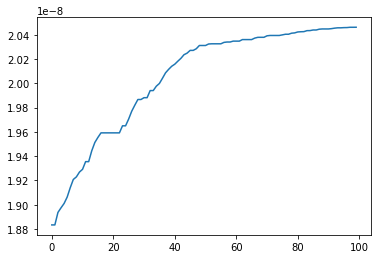

In [16]:
import matplotlib.pyplot as plt

plt.plot(best_fitnesses)

plt.xlabel('Number of Generatin')

In [17]:
final_electricity = np.sum(best_solution[0][0]*X, axis = 1)

In [18]:
error = target['Consumption'] - final_electricity
day = np.arange(len(error))
day1 = np.arange(len(error) - 1)

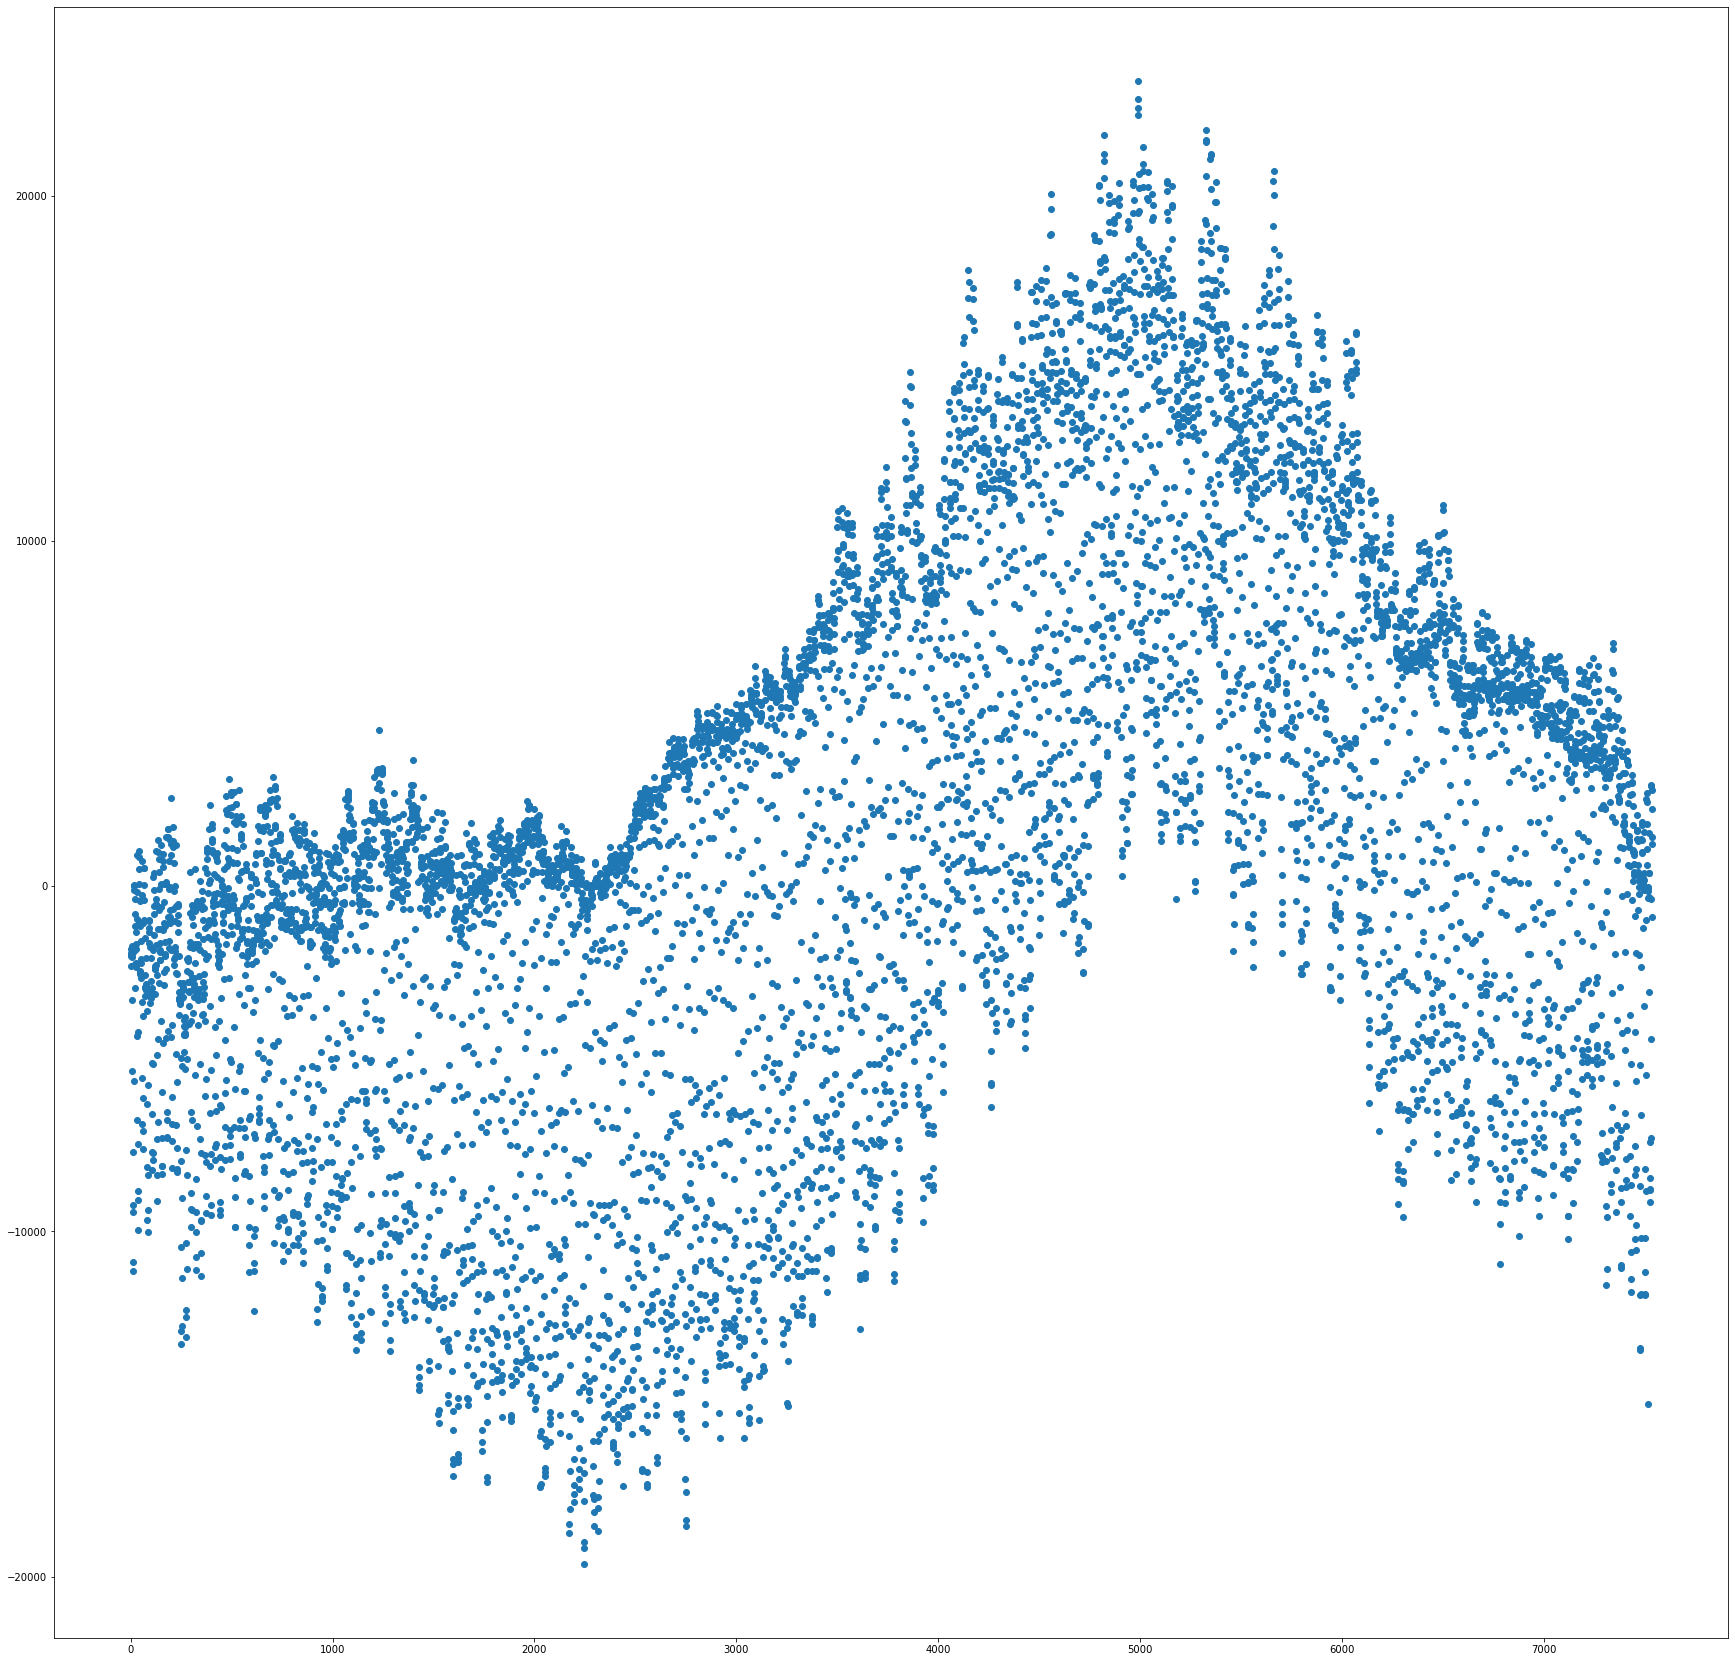

In [19]:
plt.figure(figsize=(30,30))

plt.scatter(day, error)

In [20]:
best_solution[0]

array([[9.700e+01, 1.310e+02, 6.000e+00, 4.300e+01, 1.286e+03, 1.600e+01,
        4.700e+01, 1.500e+01, 4.000e+01, 5.300e+01, 8.000e+01, 1.010e+02,
        6.400e+01, 1.400e+01, 9.870e+02, 5.700e+01, 1.340e+02, 1.360e+02,
        8.500e+01, 1.000e+00, 3.680e+02, 4.700e+01, 3.700e+01, 9.200e+01,
        3.900e+01, 0.000e+00, 1.241e+03, 2.900e+01, 8.500e+01, 1.030e+02,
        1.100e+02, 1.140e+02, 7.390e+02, 1.600e+01]])

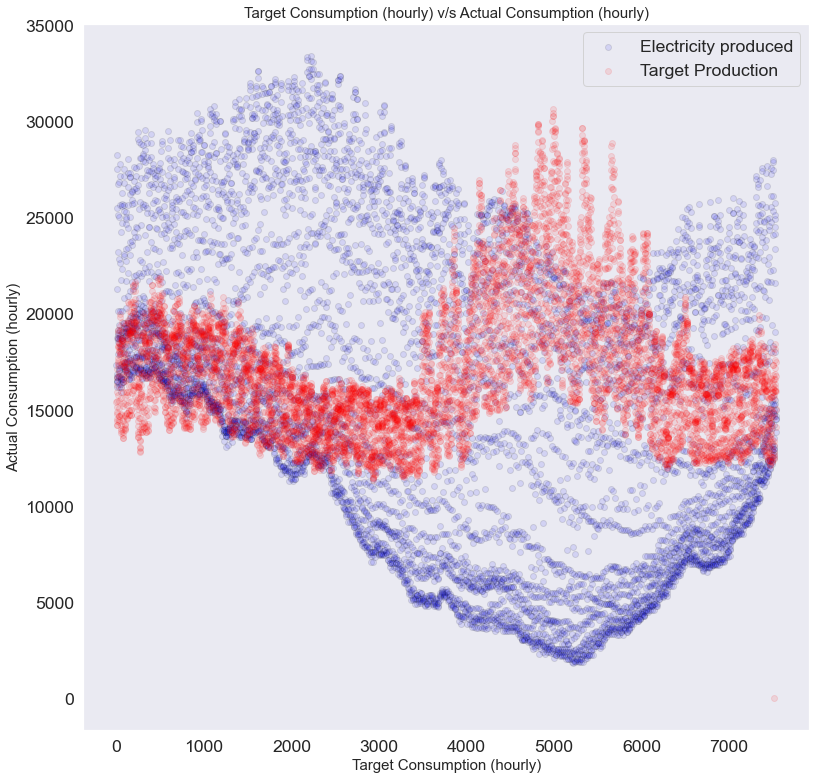

In [31]:
plt.figure(figsize=(13,13))

plt.scatter(x = day, y = final_electricity, alpha = 0.1, edgecolors= 'black', 
            label = 'Electricity produced', c = 'blue')

plt.scatter(day, target['Consumption'], label = 'Target Production', c = 'red', alpha = 0.1)

plt.xlabel('Target Consumption (hourly)', size = 15)
plt.ylabel('Actual Consumption (hourly)', size = 15)
plt.title('Target Consumption (hourly) v/s Actual Consumption (hourly)' , size = 15)

plt.legend()

plt.grid()

plt.savefig('100-gen.png')

In [22]:
type(best_solution[0])

numpy.ndarray

In [23]:
ploting_solution = best_solution[0][0] 

In [24]:
x = pd.DataFrame(min_values).transpose()
names = x.index
values = pd.DataFrame(ploting_solution)

values = values

values = values.astype(int)

d = {'names':names, 'values': values}

final_portfolio = pd.DataFrame()

final_portfolio['names'] = names
final_portfolio['values'] = values



In [25]:
final_portfolio.index = final_portfolio.names
final_portfolio

,names,values
names,,
AWT26_Power(albany),AWT26_Power(albany),97
AWP_200_Power(albany),AWP_200_Power(albany),131
D2CF_200_Power(albany),D2CF_200_Power(albany),6
AN_Bonus_150/30_Power(albany),AN_Bonus_150/30_Power(albany),43
Aria_20_Power(albany),Aria_20_Power(albany),1286
WWD-1_D64_Power(albany),WWD-1_D64_Power(albany),16
Solar_AllMax(albany),Solar_AllMax(albany),47
Solar_TrinaSolar(albany),Solar_TrinaSolar(albany),15
Solar_Mitsubishi(albany),Solar_Mitsubishi(albany),40


Text(0, 0.5, 'Renewable Units of Each')

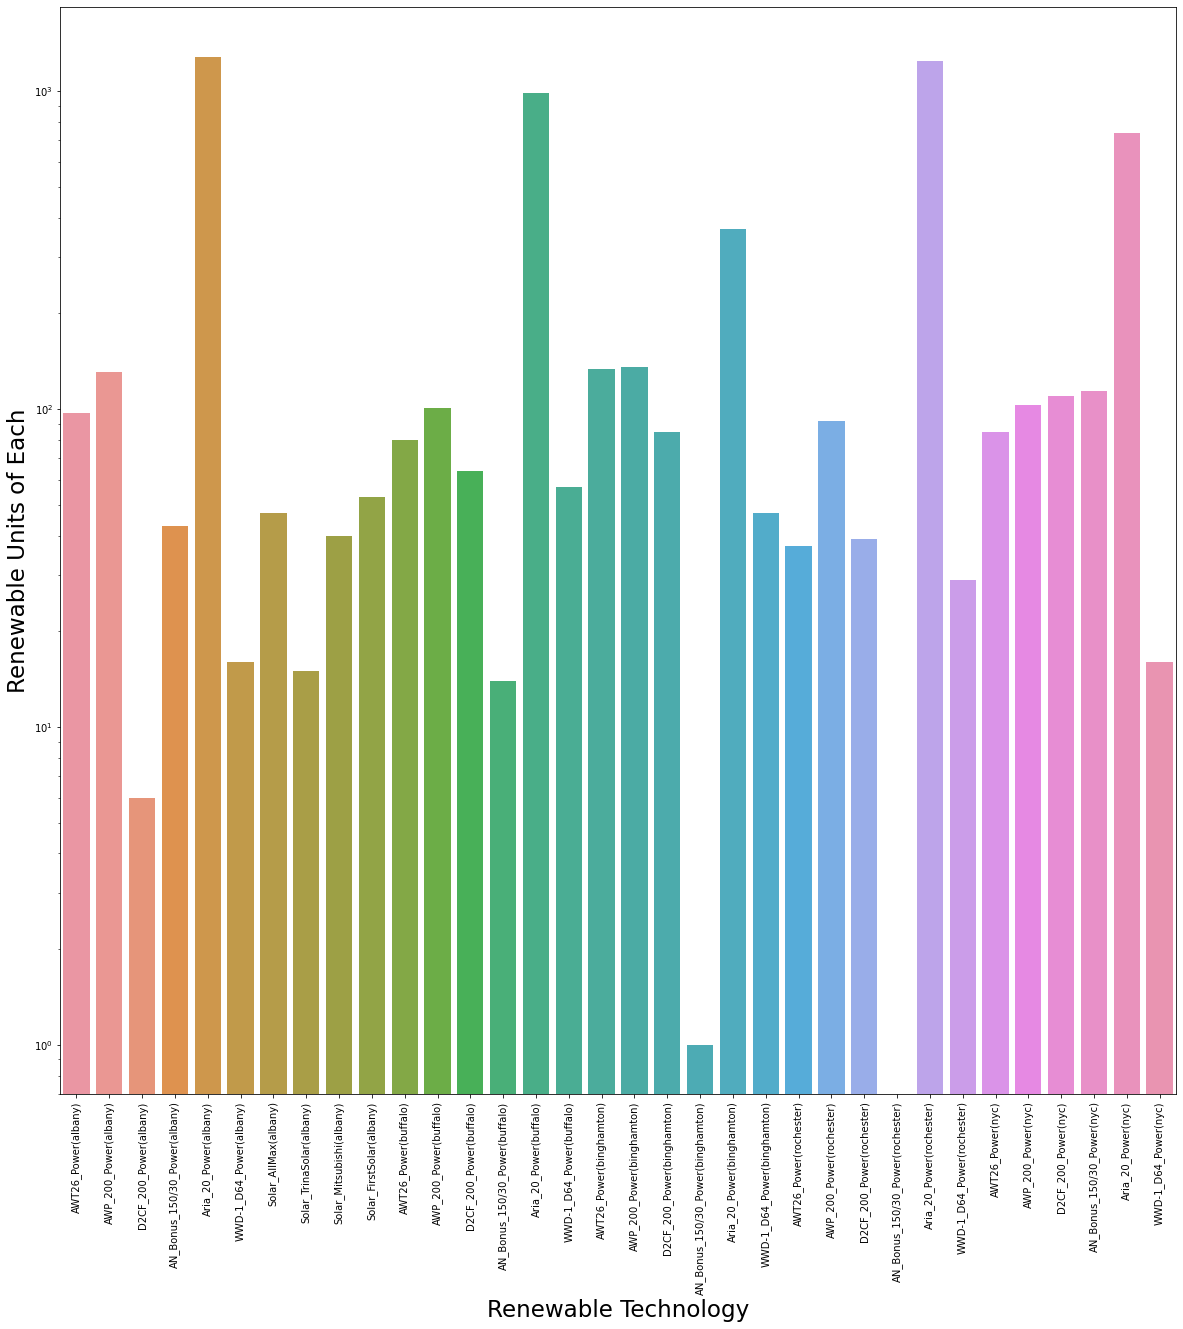

In [26]:
plt.figure(figsize=(20,20))

import seaborn as sns
#sns.set_theme(style="whitegrid")
g = sns.barplot(x="names", y="values", data= final_portfolio);
g.set_yscale("log")
plt.xticks(rotation=90);

g.set_xlabel('Renewable Technology', size = 23)
g.set_ylabel('Renewable Units of Each', size = 23)

In [27]:
max_values

[AWT26_Power(albany)                   171.0
 AWP_200_Power(albany)                 162.0
 D2CF_200_Power(albany)                100.0
 AN_Bonus_150/30_Power(albany)         102.0
 Aria_20_Power(albany)                1477.0
 WWD-1_D64_Power(albany)                26.0
 Solar_AllMax(albany)                   74.0
 Solar_TrinaSolar(albany)               74.0
 Solar_Mitsubishi(albany)               74.0
 Solar_FirstSolar(albany)               74.0
 AWT26_Power(buffalo)                   99.0
 AWP_200_Power(buffalo)                117.0
 D2CF_200_Power(buffalo)                69.0
 AN_Bonus_150/30_Power(buffalo)         76.0
 Aria_20_Power(buffalo)               1091.0
 WWD-1_D64_Power(buffalo)               18.0
 AWT26_Power(binghamton)               171.0
 AWP_200_Power(binghamton)             162.0
 D2CF_200_Power(binghamton)            100.0
 AN_Bonus_150/30_Power(binghamton)     102.0
 Aria_20_Power(binghamton)            1477.0
 WWD-1_D64_Power(binghamton)            26.0
 AWT26_Pow

In [28]:
final_portfolio

,names,values
names,,
AWT26_Power(albany),AWT26_Power(albany),97
AWP_200_Power(albany),AWP_200_Power(albany),131
D2CF_200_Power(albany),D2CF_200_Power(albany),6
AN_Bonus_150/30_Power(albany),AN_Bonus_150/30_Power(albany),43
Aria_20_Power(albany),Aria_20_Power(albany),1286
WWD-1_D64_Power(albany),WWD-1_D64_Power(albany),16
Solar_AllMax(albany),Solar_AllMax(albany),47
Solar_TrinaSolar(albany),Solar_TrinaSolar(albany),15
Solar_Mitsubishi(albany),Solar_Mitsubishi(albany),40


In [29]:
Corr = X.corr()

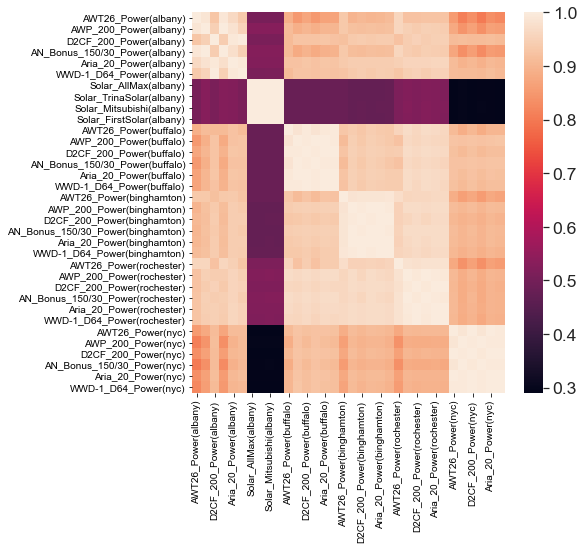

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = Corr
fig, ax=plt.subplots(figsize=(7,7))

sns.set(font_scale = 1.6)

g =sns.heatmap(corr)